In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Thermostat:
    def __init__(self, init_state_on=False, T_setpoint=70, T_band=2.0, noise_sigma=1.0, resolution=0.1):
        self.is_on = init_state_on
        self.T_setpoint = T_setpoint
        self.T_band = T_band
        self.noise_sigma = noise_sigma
        self.resolution = resolution
    def update_state(self, T_real):
        T_measured = np.round((T_real + self.noise_sigma * np.random.randn(1)[0])/self.resolution)*self.resolution
        toggled = False
        # Decide whether to turn off
        if(self.is_on):
            if(T_measured > (self.T_setpoint + self.T_band/2)):
                toggled = True
                self.is_on = False
        # Decide whether to turn on
        else:
            if(T_measured < (self.T_setpoint - self.T_band/2)):
                toggled = True
                self.is_on = True
        #print('T_real: {0}\tT_measured: {1}\tToggled: {2}\tState: {3}'.format(T_real, T_measured, toggled, self.is_on))
        return T_measured
        
    

In [41]:
def run_simulation(days = 10, add_energy_randomly_every_day=False):
    # Days to simulate
    days_max = days
    seconds_per_day = 24 * 60 * 60
    # In seconds
    time_max_s = days_max * seconds_per_day
    #time_max_s =  60

    # Furnace power (in Watts)
    furnace_power = 200000/60/60/3.41
    # Heat lost to outside per second (in Watts)
    house_power_leakage = 18000/60/60/3.41 - 0.010
    # In cubic meters
    #volume_of_house = 325 #Reasonable estimate 
    volume_of_house = 32500 # SUPERSIZED TO MAKE IT REASONABLE AS A THERMAL MASS FOR WHOLE HOUSE!!!!!
    # Density of air (in kilo/m3)
    air_density = 1.29 
    # In kilos
    house_air_mass =  volume_of_house * air_density
    # In kJ/kg-K
    air_specific_heat = 1.005
    # Kelvin offset (in degrees K)
    k_offset = 273.4
    # Amount of excess energy in a pot of water in Joules
    extra_energy_to_add = 270/3.4

    print('Furnace power: {0}\tHouse Power Leakage: {1}'.format(furnace_power, house_power_leakage))


    init_energy_house = (70 + k_offset) * air_specific_heat * house_air_mass
    
    
    when_to_add_energy = None
        
    
    thermostat = Thermostat()
    home_energy = init_energy_house
    T_real = home_energy / (air_specific_heat*house_air_mass) - k_offset
    T_measured = thermostat.update_state(T_real)
    stat_track = {'T_real': [], 'T_measured': [], 'Home_energy': [], 'Thermostat_state': [], 'Furnace_energy_sum': []}
    for time in range(time_max_s):
        # At the beginning of every day, decide when to add energy to the system that day.
        if((time % seconds_per_day == 0) and add_energy_randomly_every_day):
            when_to_add_energy = int(np.random.rand(1)[0] * seconds_per_day)
        
        # Update the stats
        stat_track['T_real'] += [T_real]
        stat_track['T_measured'] += [T_measured]
        stat_track['Home_energy'] += [home_energy]
        stat_track['Thermostat_state'] += [thermostat.is_on]

        # Add heat to house if furnace is on
        if(thermostat.is_on):
            home_energy += furnace_power
            stat_track['Furnace_energy_sum'] += [furnace_power if(time==0) else furnace_power + stat_track['Furnace_energy_sum'][-1]]
        else:
            stat_track['Furnace_energy_sum'] += [0 if(time==0) else 0 + stat_track['Furnace_energy_sum'][-1]]
            
        # Add heat randomly (like a pot of hot water) to house
        if(add_energy_randomly_every_day and (((time - when_to_add_energy) % seconds_per_day) == 0)):
            home_energy += extra_energy_to_add
            print('Adding energy to system for no good reason!')
            
        # Remove heat from the house to outside
        home_energy -= house_power_leakage
        # Calculate real temperature of house
        T_real = home_energy / (air_specific_heat*house_air_mass) - k_offset
        # Update state of thermostat and get the measured temp
        T_measured = thermostat.update_state(T_real)

    print('Used {0} Watts from furnace.'.format(stat_track['Furnace_energy_sum'][-1]))
    
    return stat_track

In [46]:
stat_track1 = run_simulation(days=1000)
stat_track2 = run_simulation(days=1000, add_energy_randomly_every_day=True)


Furnace power: 16.291951775822742	House Power Leakage: 1.456275659824047
Used 125853030.30102132 Watts from furnace.
Furnace power: 16.291951775822742	House Power Leakage: 1.456275659824047
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to s

Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no g

Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no g

Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no g

Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no g

Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no good reason!
Adding energy to system for no g

In [47]:
print(stat_track2['Furnace_energy_sum'][-1] - stat_track1['Furnace_energy_sum'][-1])

-80221.57054281235


In [49]:
(stat_track2['Furnace_energy_sum'][-1] - stat_track1['Furnace_energy_sum'][-1]) / (270/3.4) 

-1010.197554983563

In [50]:
plt.figure(figsize=(10, 6))  # Define the size of the plot
    
stat = 'T_real'
# Plotting
plt.plot(stat_track1[stat], label=stat)
plt.plot(stat_track2[stat], label=stat)

# Adding labels and legend
plt.xlabel('Time (s)')
plt.ylabel(stat)
plt.title('{0} over Time'.format(stat))
plt.legend()

# Display the plot
plt.grid(True) # Enable grid
plt.show()



KeyboardInterrupt



/tmp/ipykernel_23473/1774003230.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(time_arr, stat_track1[stat]/time_arr, label=stat)
/tmp/ipykernel_23473/1774003230.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(time_arr, stat_track2[stat]/time_arr, label=stat)


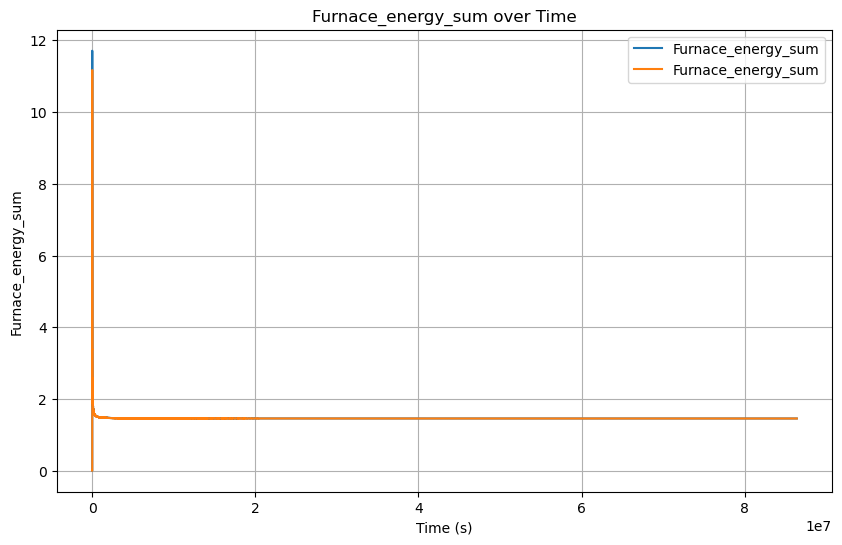

In [61]:
plt.figure(figsize=(10, 6))  # Define the size of the plot
    
stat = 'Furnace_energy_sum'
# Plotting
time_arr = np.arange(seconds_per_day * 1000)
plt.plot(time_arr, stat_track1[stat]/time_arr, label=stat)
plt.plot(time_arr, stat_track2[stat]/time_arr, label=stat)

# Adding labels and legend
plt.xlabel('Time (s)')
plt.ylabel(stat)
plt.title('{0} over Time'.format(stat))
plt.legend()

# Display the plot
plt.grid(True) # Enable grid
plt.show()


In [55]:
(stat_track2['Furnace_energy_sum'][-1]/(1000 * seconds_per_day))

1.4557038047509088

In [58]:
seconds_per_day*((stat_track2['Furnace_energy_sum'][-1]/(1000 * seconds_per_day)) - (stat_track1['Furnace_energy_sum'][-1]/(1000 * seconds_per_day)))

-80.22157054280896

In [65]:
np.arange(10)[-3:]

array([7, 8, 9])

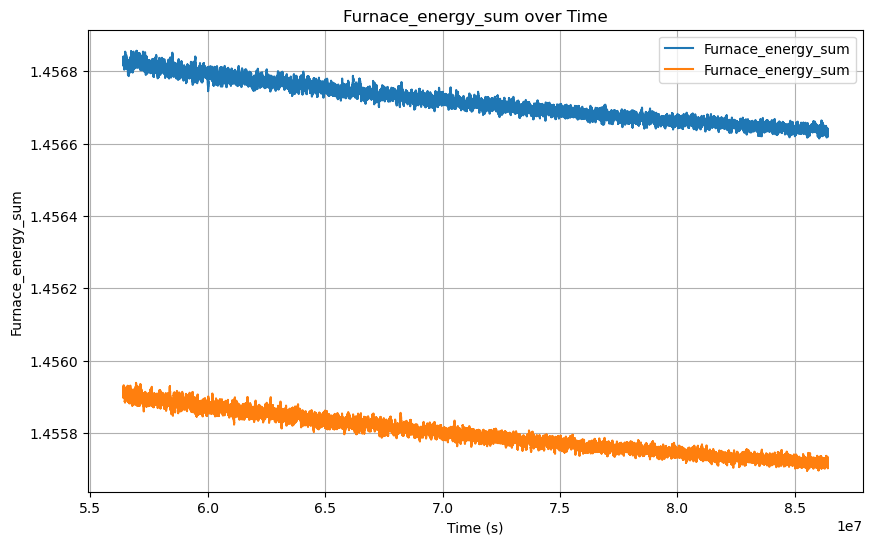

In [68]:
plt.figure(figsize=(10, 6))  # Define the size of the plot
    
stat = 'Furnace_energy_sum'
# Plotting
time_arr = np.arange(seconds_per_day * 1000)
plt.plot(time_arr[-30000000:], stat_track1[stat][-30000000:]/time_arr[-30000000:], label=stat)
plt.plot(time_arr[-30000000:], stat_track2[stat][-30000000:]/time_arr[-30000000:], label=stat)

# Adding labels and legend
plt.xlabel('Time (s)')
plt.ylabel(stat)
plt.title('{0} over Time'.format(stat))
plt.legend()

# Display the plot
plt.grid(True) # Enable grid
plt.show()


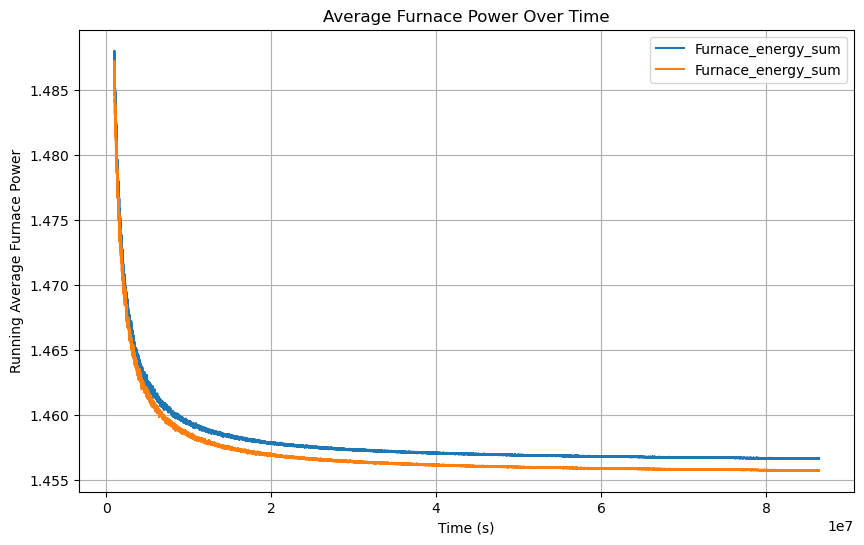

In [77]:
plt.figure(figsize=(10, 6))  # Define the size of the plot
    
stat = 'Furnace_energy_sum'
# Plotting
time_arr = np.arange(seconds_per_day * 1000)
plt.plot(time_arr[1000000::100], stat_track1[stat][1000000::100]/time_arr[1000000::100], label=stat)
plt.plot(time_arr[1000000::100], stat_track2[stat][1000000::100]/time_arr[1000000::100], label=stat)

# Adding labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Running Average Furnace Power')
plt.title('Average Furnace Power Over Time')
plt.legend()

# Display the plot
plt.grid(True) # Enable grid
plt.show()


In [75]:
np.arange(100)[10::4]

array([10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74,
       78, 82, 86, 90, 94, 98])